In [71]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

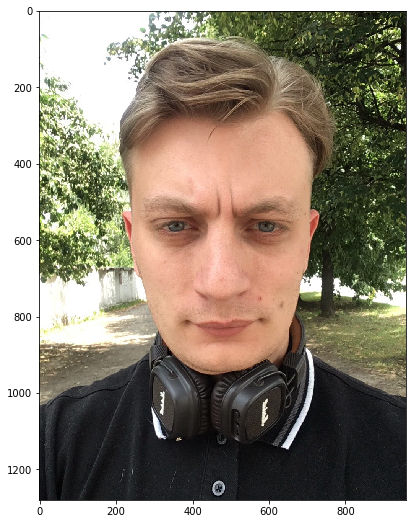

In [72]:
import cv2
image = cv2.imread('TestImages/testImage.jpg',-1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(9,9))
plt.imshow(image)

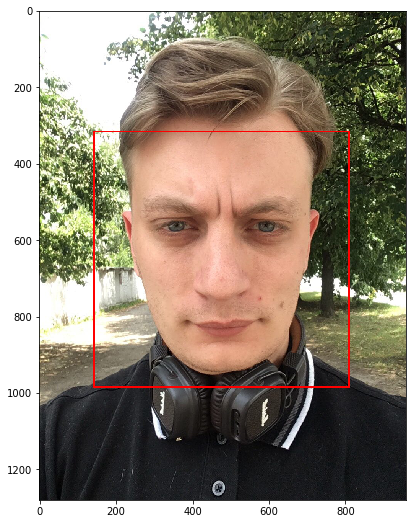

In [73]:

face_cascade = cv2.CascadeClassifier('Cascades/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(image, 1.2, 2)

image_with_detections = image.copy()

for (x,y,w,h) in faces:

    cv2.rectangle(image_with_detections,(x,y),(x+w,y+h),(255,0,0),3) 

fig = plt.figure(figsize=(9,9))
plt.imshow(image_with_detections)


In [74]:
import torch
from model import Net

net = Net()

net.load_state_dict(torch.load('savedModels/TrainedFRModel.1.pt'))
net.eval()

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv1_bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(4, 4), stride=(1, 1))
  (conv2_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv3_bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 256, kernel_size=(2, 2), stride=(1, 1))
  (conv4_bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(256, 512, kernel_size=(1, 1), stride=(1, 1))
  (conv5_bn): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=86528, out_features=1500, bias=True)
  (fc1_bn): BatchNorm1d(1500, eps=1e-05, momentum=0.1, affine=T

(1, 1, 224, 224)


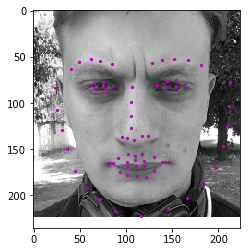

In [75]:
from torch.autograd import Variable

image_copy = np.copy(image)

for (x,y,w,h) in faces:
    image = cv2.imread('TestImages/testImage.jpg',-1)

    roi = image_copy[y:y+h, x:x+w]
    
    gray_image = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    zeros_placeholder = np.zeros((244, 244))
    norm_image = cv2.normalize(gray_image,  zeros_placeholder, 0, 1, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    resized_image = cv2.resize(norm_image, (224, 224)) 

    reshaped_image = resized_image.reshape(resized_image.shape[0], resized_image.shape[1], 1, 1)
    reshaped_image = reshaped_image.transpose((3, 2, 1, 0))
    print(reshaped_image.shape)

    image = Variable(torch.from_numpy(reshaped_image))
    
    output_pts = net(image)
    output_pts = output_pts.view(output_pts.size()[0], 68, -1)
    predicted_key_pts = output_pts.data
    predicted_key_pts = predicted_key_pts.numpy()
    predicted_key_pts = predicted_key_pts*90.0 + 60

    rotated = np.squeeze(reshaped_image[0]).transpose(1,0)
    plt.imshow(np.squeeze(rotated), cmap='gray')
    plt.scatter(predicted_key_pts[0][:, 0], predicted_key_pts[0][:, 1] + 20, s=20, marker='.', c='m')